In [11]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from ggplot import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
zillow = pd.read_csv("properties_2016.csv",low_memory = False, index_col = False)
dd = pd.read_excel("zillow_data_dictionary.xlsx",encoding='utf-8',index_col=None)

In [37]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
trainingdata = pd.read_csv("train_2016_v2.csv",parse_dates=['transactiondate'], date_parser=dateparse,low_memory = False, index_col = False)

In [4]:
bedbath = zillow.groupby(['bedroomcnt','bathroomcnt']).size().reset_index().rename(columns={0:'countbedbath'})

In [6]:
bedbath.sort_values(by = "countbedbath").tail()

,bedroomcnt,bathroomcnt,countbedbath
46,2.0,1.0,245168
49,2.0,2.0,255950
99,4.0,3.0,262049
97,4.0,2.0,288282
73,3.0,2.0,634405


## We can observe that the combination of 3 bed room and 2 bathroom is the house type which is mostly recorded and followed by 4 bed and 2 bathroom.

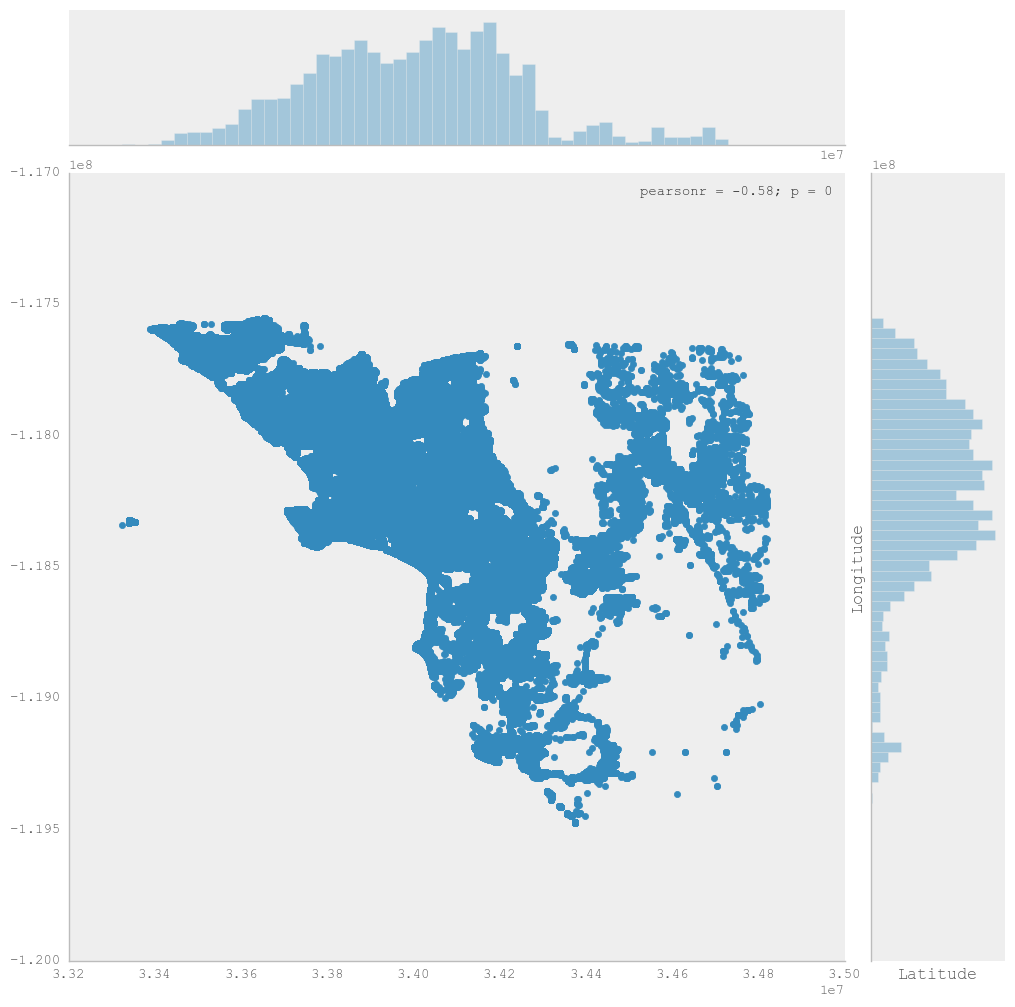

In [31]:
plt.figure(figsize=(14,14))
sns.jointplot(x=zillow.latitude.values, y=zillow.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [ ]:
# import folium
# mapit = folium.Map( location=[52.667989, -1.464582], zoom_start=6 )
# for coord in latlon:
#     folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )

# mapit.save( 'map.html')

In [45]:
new_trained = pd.merge(trainingdata, zillow, on='parcelid', how='left')
new_trained.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
90270,10774160,-0.0356,2016-12-30,1.0,NaN,NaN,1.0,1.0,NaN,4.0,...,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,12046695,0.0070,2016-12-30,NaN,NaN,NaN,3.0,3.0,NaN,4.0,...,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,12995401,-0.2679,2016-12-30,NaN,NaN,NaN,2.0,4.0,NaN,7.0,...,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,NaN,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,NaN,6.037601e+13
90274,12566293,0.4207,2016-12-30,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,66258.0,163037.0,2015.0,96779.0,2560.96,NaN,NaN,6.037544e+13


In [59]:
new_trained['month'] = new_trained['transactiondate'].apply(lambda x: "%d" % ( x.month))
transactionpermonth = new_trained.groupby(['month']).size()
transactionpermonth

month
1      6556
10     4977
11     1826
12     1739
2      6333
3      8652
4      9311
5      9961
6     10922
7      9947
8     10476
9      9575
dtype: int64

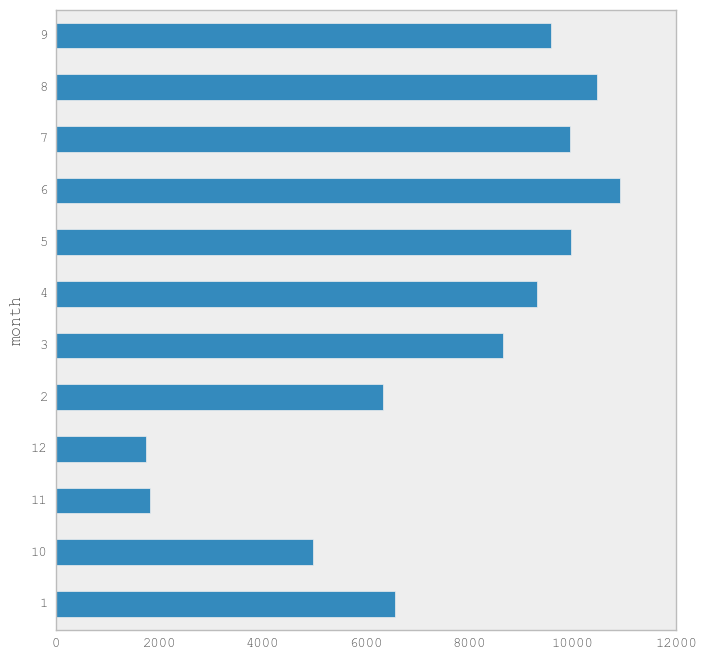

In [64]:
plt = transactionpermonth.plot(kind = 'barh')

fig_size[0] = 8
fig_size[1] = 8

### The most number of sales happened in 2016 was in June month where as minimum was in December month

In [66]:
average = zillow['finishedsquarefeet15']/zillow['taxamount']
average.mean()

0.7224090882566992

### The tax paid by consumer was roughly 0.72 dollars per Sq. ft. in 2015 can be inferred from this

In [71]:
x = [ (zillow['fireplacecnt'].isnull()) | (zillow['garagecarcnt'].isnull()) | (zillow['hashottuborspa'].isnull()) ]

In [92]:
np.size(x) - np.count_nonzero(x)
# Use a.empty, a.bool(), a.item(), a.any() or a.all()

11564

### There are total 11,564 number of properties which has all three ammenities i.e. Fireplace, garage and hottub/pool.

In [79]:
import numpy as np
np.count_nonzero(x)

2973653

In [98]:
# zillow.airconditioningtypeid.count()
zillow['airconditioningtypeid'].value_counts()

1.0     742364
13.0     58457
5.0       8795
11.0      1818
12.0        59
9.0         19
3.0          7
Name: airconditioningtypeid, dtype: int64

### The most used AC type is central where as least used is Evoparitive cooler which is a very old technology.